In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

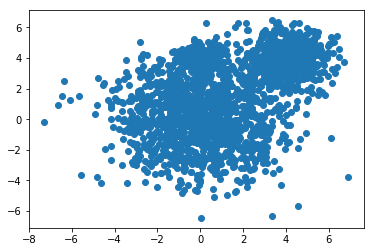

In [2]:
D = 2 # so we can visualize it more easily
s = 4 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 2000 # number of samples
X = np.zeros((N, D))
X[:1200, :] = np.random.randn(1200, D)*2 + mu1
X[1200:1800, :] = np.random.randn(600, D) + mu2
X[1800:, :] = np.random.randn(200, D)*0.5 + mu3
plt.scatter(X[:,0], X[:,1])

In [5]:
def gmm(X, K, max_iter=20, smoothing=1e-2):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K) / K  # uniform
    
    # initialize M to random, initialize C to spherical with variance 1
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.eye(D)
        
    lls = []
    weighted_pdfs = np.zeros((N, K)) # we'll use these to store the PDF value of sample n and Gaussian k
    
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        for k in range(K):
            weighted_pdfs[:, k] = pi[k] * multivariate_normal.pdf(X, M[k], C[k])
        R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)
        
        # step 2: recalculate params
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk

            delta = X - M[k] # N x D
            Rdelta = np.expand_dims(R[:,k], -1) * delta # multiplies R[:,k] by each col. of delta - N x D
            C[k] = Rdelta.T.dot(delta) / Nk + np.eye(D)*smoothing # D x D
        
        ll = np.log(weighted_pdfs.sum(axis=1)).sum()
        lls.append(ll)
        if i > 0:
            if np.abs(lls[i] - lls[i-1]) < 0.1:
                break
    
    plt.plot(lls)
    plt.title("Log-Likelihood")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)

    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R

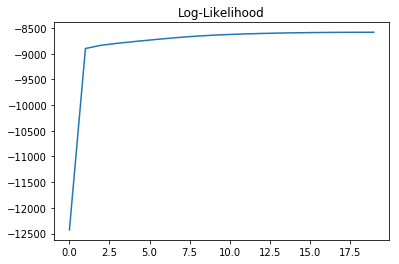

pi: [0.10663397 0.59316831 0.30019772]
means: [[ 0.05933076  3.93658473]
 [-0.02040854 -0.04121078]
 [ 3.97752233  3.95319927]]
covariances: [[[ 0.2645194   0.00991149]
  [ 0.00991149  0.2833368 ]]

 [[ 3.94060428 -0.26820065]
  [-0.26820065  3.91313696]]

 [[ 0.96591111  0.03133643]
  [ 0.03133643  0.95601835]]]


array([[1.23384169e-34, 1.00000000e+00, 5.88682515e-14],
       [7.99969385e-31, 9.99999924e-01, 7.61649428e-08],
       [2.95301547e-12, 9.99999997e-01, 3.34458356e-09],
       ...,
       [8.88361786e-01, 1.11575840e-01, 6.23741502e-05],
       [9.36329948e-01, 6.34867724e-02, 1.83279483e-04],
       [8.09330342e-01, 1.90639527e-01, 3.01318643e-05]])

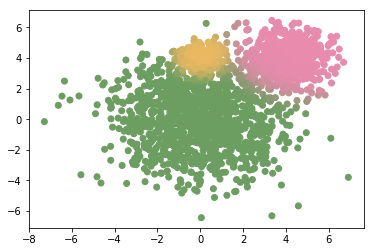

In [6]:
gmm(X, K=3)